In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from skbio.stats.composition import clr
GSE160269_CD45POS_PATH = 'project_path/GSE160269_CD45pos_cells.txt'
GSE160269_CD45NEG_PATH = 'project_path/GSE160269_CD45neg_cells.txt'
ANTIPD1_PROPORTION_PATH = './results/step1_firstClustering/proportion/proportion_sample.csv'

In [2]:
cd45_pos = pd.read_csv(GSE160269_CD45POS_PATH,sep=' ')
cd45_pos = cd45_pos.loc[cd45_pos['sample'].isin(['P126N','P127N','P128N','P130N','P126T','P127T','P128T','P130T'])]

In [3]:
group = np.array(['Normal']* cd45_pos.shape[0])
group[cd45_pos['sample'].isin(['P126N','P127N','P128N','P130N'])] = 'Tumor'
cd45_pos['group'] = group

In [4]:
cd45_neg = pd.read_csv(GSE160269_CD45NEG_PATH,sep=' ')
cd45_neg = cd45_neg.loc[cd45_neg['sample'].isin(['P126N','P127N','P128N','P130N','P126T','P127T','P128T','P130T'])]

In [5]:
group = np.array(['Normal']* cd45_neg.shape[0])
group[cd45_neg['sample'].isin(['P126N','P127N','P128N','P130N'])] = 'Tumor'
cd45_neg['group'] = group

In [6]:
all_cells_n = cd45_pos.shape[0]+cd45_neg.shape[0]
all_cells_n

27271

In [7]:
all_cells = pd.concat([cd45_pos,cd45_neg])
print(all_cells.shape)
pos_propotion = all_cells.groupby(['sample','annotated_type'])['cell'].count()
pos_propotion = pos_propotion/pos_propotion.groupby(level=0).sum()
pos_propotion = pos_propotion.unstack()
pos_propotion['Fibroblast'] = pos_propotion['Fibroblast']+ pos_propotion['FRC']
pos_propotion = pos_propotion.iloc[:,~(pos_propotion.columns == 'FRC')]
cells = ['Tcell','Bcell','Myeloid','Endothelial','Fibroblast','Pericytes','Epithelial']
pos_propotion = pos_propotion[cells]

(27271, 4)


In [8]:
pos_propotion = pd.DataFrame(clr(pos_propotion),index = pos_propotion.index, columns = pos_propotion.columns)

In [9]:
pos_propotion

annotated_type,Tcell,Bcell,Myeloid,Endothelial,Fibroblast,Pericytes,Epithelial
sample,,,,,,,
P126N,1.264258,1.503539,-0.810410,0.340765,2.456802,-2.468638,-2.286316
P126T,2.508096,0.562186,1.852101,-2.813694,0.299822,-2.813694,0.405182
P127N,0.110045,1.142530,-0.290966,0.368280,1.822072,-2.662544,-0.489417
P127T,1.853060,-1.086668,1.104586,-0.477291,-1.180194,-2.472963,2.259469
P128N,0.569473,0.762932,0.619580,-0.805033,2.963769,-1.919394,-2.191327
P128T,1.780973,2.685970,-0.048939,-2.639206,0.672958,-3.737818,1.286062
P130N,2.075218,-0.374949,0.127508,0.114823,2.573138,-2.166708,-2.349030
P130T,1.705541,0.003977,1.383254,-2.393919,0.881774,-2.761643,1.181017


In [10]:
P126 = pos_propotion.loc['P126N'] - pos_propotion.loc['P126T']
P127 = pos_propotion.loc['P127N'] - pos_propotion.loc['P127T']
P128 = pos_propotion.loc['P128N'] - pos_propotion.loc['P128T']
P130 = pos_propotion.loc['P130N'] - pos_propotion.loc['P130T']
NC_changed =  pd.concat([P126,P127,P128,P130],axis=1).T
NC_changed.index = ['GSE160296_P126','GSE160296_P127','GSE160296_P128','GSE160296_P130']
NC_changed

annotated_type,Tcell,Bcell,Myeloid,Endothelial,Fibroblast,Pericytes,Epithelial
GSE160296_P126,-1.243838,0.941353,-2.662511,3.154458,2.156981,0.345056,-2.691499
GSE160296_P127,-1.743016,2.229198,-1.395552,0.845571,3.002266,-0.189581,-2.748886
GSE160296_P128,-1.211499,-1.923038,0.668519,1.834173,2.290811,1.818424,-3.477390
GSE160296_P130,0.369676,-0.378926,-1.255745,2.508742,1.691365,0.594935,-3.530047


In [11]:
our = pd.read_csv(ANTIPD1_PROPORTION_PATH,index_col=0)
our = our.loc[:,~(our.columns == 'treat_sample.1')]
our.loc['Post_R']['Epithelial cells'] = 0.00001
our = pd.DataFrame(clr(our),index = our.index, columns = our.columns)
our

,T cells,B cells,Myeloid cells,Endothelial cells,Fibroblasts,Pericytes,Epithelial cells
treat_sample,,,,,,,
Pre_A,1.550014,0.924340,-0.225710,0.096091,-0.515563,-0.903787,-0.925386
Post_A,1.056319,-0.910293,1.111441,-0.705383,1.191102,-1.972203,0.229017
Pre_D,0.749512,-0.901814,-0.663234,0.806967,-1.738062,1.868864,-0.122234
Post_D,0.649679,-0.780723,-0.273067,0.401819,-1.098386,-1.007036,2.107713
Pre_I,1.219671,-0.787200,-0.412194,-0.817659,-0.728931,-0.326615,1.852928
Post_I,0.922306,-0.388765,0.030136,-0.779127,1.012632,-1.025559,0.228377
Pre_R,2.070781,0.418738,0.881644,0.746937,-3.919641,-0.160381,-0.038078
Post_R,3.390527,2.317595,1.702378,0.293926,0.727300,-0.814165,-7.617561
Pre_B,1.651315,-0.516705,-0.052744,0.563670,-0.421943,-1.209852,-0.013742


In [12]:
A = our.loc['Post_A'] - our.loc['Pre_A']
B = our.loc['Post_B'] - our.loc['Pre_B']
C = our.loc['Post_C'] - our.loc['Pre_C']
D = our.loc['Post_D'] - our.loc['Pre_D']
I = our.loc['Post_I'] - our.loc['Pre_I']
N = our.loc['Post_N'] - our.loc['Pre_N']
R = our.loc['Post_R'] - our.loc['Pre_R']

our_changed =  pd.concat([A,D,I,R,B,C,N],axis=1).T
our_changed.index = ['BR_A','BR_D','BR_I','BR_R','GR_B','GR_C','GR_N']

In [13]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(np.concatenate((NC_changed,our_changed)))
X = pca.transform(np.concatenate((NC_changed,our_changed)))

In [14]:
y = np.array(['GSE160296']*4+['NCR']*4+['CR']*3)
y =='GSE160296'

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False])

In [15]:
plot_2d = pd.DataFrame(X,columns=['PC1','PC2'])
plot_2d['group'] = y
plot_2d['sample'] = ['P126','P127','P128','P130','P001','P004','P009','P014','P002','P003','P011']

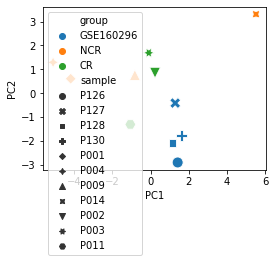

In [16]:
fig,ax = plt.subplots(1,1,figsize=(4, 3))
sns.scatterplot(x="PC1", y="PC2", hue="group", data=plot_2d, style="sample",ax=ax,s=120)
ax.legend(prop={'size': 10})

In [17]:
prop = pd.DataFrame(np.concatenate((NC_changed,our_changed)),index= plot_2d['sample'],columns=our.columns)

In [18]:
cors = prop.T.corr()

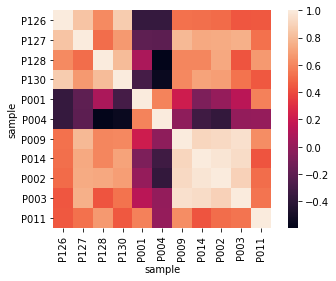

In [19]:
ax = sns.heatmap(
    cors, 
    square=True
)

In [20]:
c_NCR = cors.iloc[0:4,4:8].values.flatten().tolist()
c_CR = cors.iloc[0:4,8:11].values.flatten().tolist()

In [21]:
import scipy
scipy.stats.ttest_ind(c_NCR, c_CR)

Ttest_indResult(statistic=-2.7049195404099176, pvalue=0.011893178655137795)

In [22]:
scipy.stats.mannwhitneyu(c_NCR, c_CR)

MannwhitneyuResult(statistic=63.0, pvalue=0.13135638805779795)

In [25]:
cor_mat = pd.DataFrame([[cors.iloc[0:4,0:4].mean().mean(),cors.iloc[0:4,8:11].mean().mean(),cors.iloc[0:4,4:8].mean().mean()],
                        [cors.iloc[8:11,0:4].mean().mean(),cors.iloc[8:11,8:11].mean().mean(),cors.iloc[8:11,4:8].mean().mean()],
                        [cors.iloc[4:8,0:4].mean().mean(),cors.iloc[4:8,8:11].mean().mean(),cors.iloc[4:8,4:8].mean().mean()]
                       ],index=['GSE160296','CR','NCR'],columns=['GSE160296','CR','NCR'])

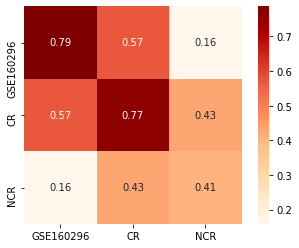

In [26]:
ax = sns.heatmap(
    cor_mat, 
    square=True,
    annot=True,
    cmap="OrRd"
)